## Analyzing problem regimes for (1D Convection PDE)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

### Understanding the Logistic Growth Curve Across $\beta$ Values

To guide our PINN training setup, we first visualize how the **1-D convection solution** changes with different values of ρ:

$$
\frac{du}{dt} = - \beta \cdot \frac{du}{dx}
$$

with the initial condition:

$$
u(x,0)=sin(x)
$$

Its analytical solution is:

$$
u(x,t) = sin(x - \beta t)
$$



This helps us:
- Identify **qualitative regimes** (slow, moderate, fast growth).
- Choose a **representative $\beta$ interval** for training.
- Decide how many $\beta$ points are needed to capture the diversity of dynamics.

Below, we plot the solution $u(x,t)$ for a range of ρ values, $t \in [0, 1]$ and $x \in [0, 2\pi]$.

In [4]:
def convection_solution(x, t, beta):
    return np.sin(x - beta * t)    

t = np.linspace(0, 1, 200)
x = np.linspace(0, 2*np.pi, 200)
beta_values=[0.1,1,2,4,6,8,10,20]

T, X = np.meshgrid(t, x, indexing='ij')  # Create meshgrid

torch.from_numpy(x).float()
beta_groups = {
    "Low (slow growth)": [0.1, 0.3, 0.5],
    "Medium (balanced growth)": [1.0, 2.0, 3.0],
    "High (fast/stiff growth)": [5.0, 10.0, 20.0],
}

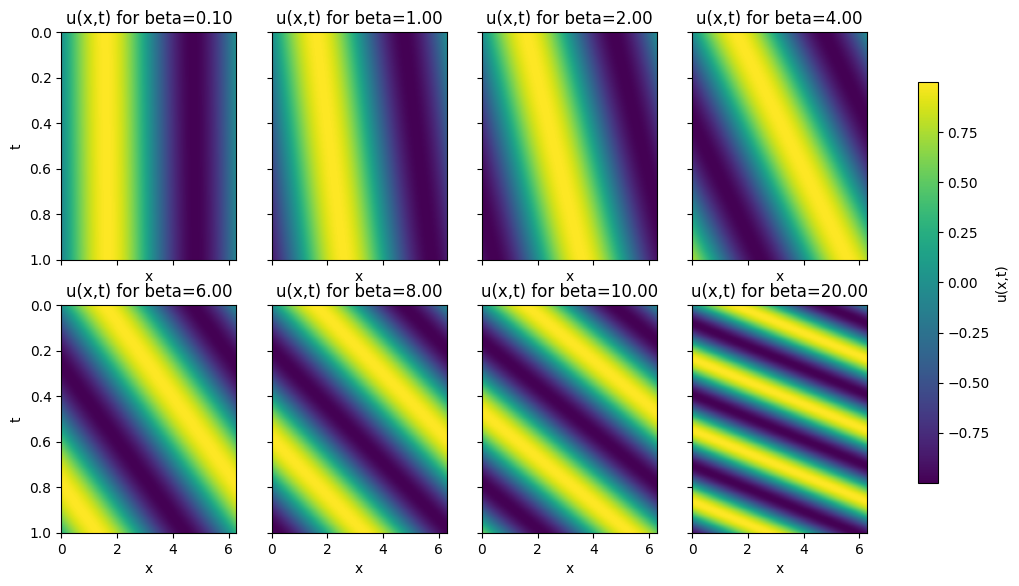

In [6]:
# Create 2x4 subplot grid
fig, axes = plt.subplots(2, 4, figsize=(13, 6.5), sharex=True, sharey=True)

# Flatten axes array for easy looping
axes = axes.flatten()

# Store the last imshow() object for colorbar
im = None

for i, ax in enumerate(axes):
    beta = beta_values[i]
    u = convection_solution(X, T, beta)  # Compute solution for given beta
    
    im = ax.imshow(u, extent=[0, 2 * np.pi, 1, 0], aspect='auto', cmap='viridis')
    ax.set_xlabel('x')
    if i % 4 == 0:
        ax.set_ylabel('t')
    ax.set_title(f'u(x,t) for beta={beta:.2f}')

# Add a colorbar to the right of all subplots
fig.colorbar(im, ax=axes, location="right", shrink=0.8, pad=0.05, label="u(x,t)")

plt.show()

### Regime Interpretation

- **Low $\beta$ (< 2.0)**: 
- **Moderate $\beta$ (2.0 – 10.0)**: 
- **High $\beta$ (> 10.0)**: 

### Training Range Selection


## !!!



## !!!